In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("Data/diabetes.csv")
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [37]:
df.shape        # 특성 10개

(442, 11)

In [2]:
# 문제집,정답지 만들기

X = df.drop("target", axis = 1)
Y = df["target"]

In [4]:
# 표준화는 필요없고 데이터분할만
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y)      # 75:25로 쪼개줌

In [8]:
# decision tree 분류가 아니라 회귀로 가져오기
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor()
model.fit(train_x, train_y)          # 모델만들어서 훈련데이터로만 학습 

DecisionTreeRegressor()

In [9]:
# 과대적합됐는지 확인하기 위해 훈련데이터,시험데이터 둘다넣어서 확인
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

# 과대적합됐음

1.0
-0.30665445373318434


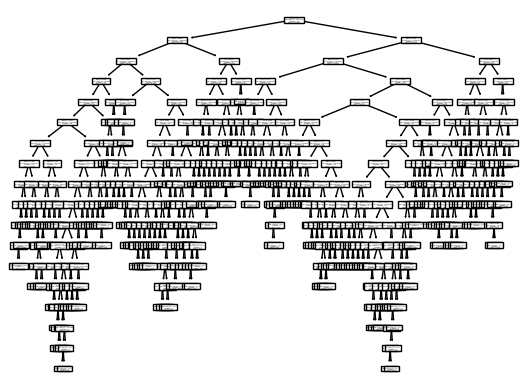

In [10]:
import matplotlib.pyplot as plt
plot_tree(model, feature_names = X.columns)       # 모델그려보기
plt.show()

In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# max_depth, min_samples_leaf, min_samples_split 등으로 과대적합 막아줄수있음
model = DecisionTreeRegressor(max_depth = 5)        # 최대깊이 조정
model.fit(train_x, train_y)        

DecisionTreeRegressor(max_depth=5)

In [13]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.6825798908539745
0.17087429943881216


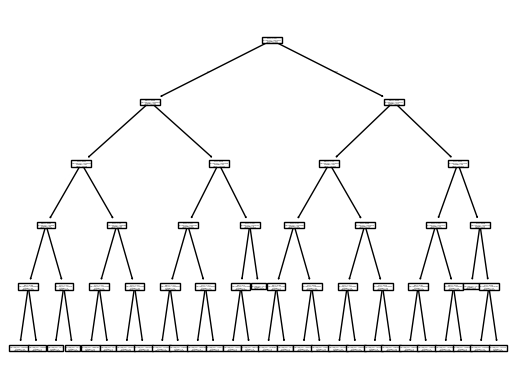

In [15]:
import matplotlib.pyplot as plt
plot_tree(model, feature_names = X.columns)       # 모델그려보기
plt.show()

# 그리드 서치

In [25]:
# 그리드 서치  -  특성들에 대해 하나씩 시뮬레이션 돌려줌
# max_depth, min_samples_leaf, min_samples_split, ... 

param = {"max_depth" : [None, 1, 5, 10, 20],
         "min_samples_leaf" : range(1, 21),
         "min_samples_split" : [2, 5, 10, 20, 30, 40],
         "max_features" : [None, "sqrt", "log2", 0.7]}     # 특성 10개중에서  None:모든특성 다써라 / sqrt:루트취한것만큼 / log2:로그취한것만큼 / 0.7: 70%만큼


from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param,
                           #cv = 5, scoring = "neg_mean_squared_error",     # 5겹으로 교차검증 
                           cv = 5, scoring = "r2", 
                           verbose = 1)           # r2
# 분류모델이면 scoring에 accuracy적어줘야하는데  회귀모델은 mse  <- mse는 작을수록 좋으므로 앞에 음수값(=neg) 취해줄것 

grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2', 0.7],
                         'min_samples_leaf': range(1, 21),
                         'min_samples_split': [2, 5, 10, 20, 30, 40]},
             scoring='r2', verbose=1)

In [26]:
grid_search.best_params_       # 언제 가장 성능이 좋았는지 보여줌

{'max_depth': 20,
 'max_features': 0.7,
 'min_samples_leaf': 13,
 'min_samples_split': 30}

In [24]:
# (-grid_search.best_score_) ** (1/2)         # MAE값 => 이정도 오차가 있었다

57.378357600449895

In [27]:
model = grid_search.best_estimator_
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.6035060419986578
0.30924531298160696


In [29]:
pd.DataFrame(grid_search.cv_results_).to_excel("grid_search_result.xlsx")

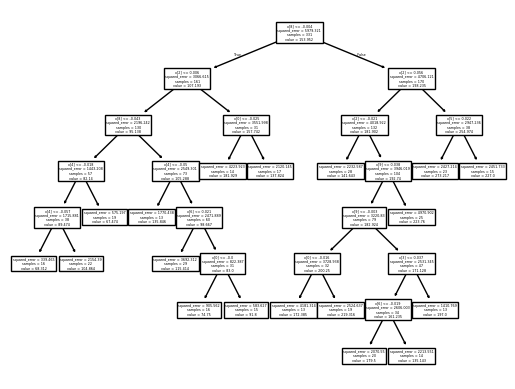

In [30]:
plot_tree(model)
plt.show()

# 랜덤 서치

In [31]:
# 그리드 서치 vs 랜덤 서치
# 랜덤 서치 : 빠름. 근데 그리드서치랑 성능차이 크게는 안남

from sklearn.model_selection import RandomizedSearchCV
model = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator = model,
                                  param_distributions = param,
                                  n_iter = 1000, cv = 5, scoring = "r2") 
# 2400개 중에서 랜덤으로 1000개만 가져와서 돌려라.   교차검증은 5개의 등분으로. 

random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=1000,
                   param_distributions={'max_depth': [None, 1, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         0.7],
                                        'min_samples_leaf': range(1, 21),
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40]},
                   scoring='r2')

In [32]:
random_search.best_params_       # 언제 가장 성능이 좋았는지 보여줌

{'min_samples_split': 10,
 'min_samples_leaf': 12,
 'max_features': 0.7,
 'max_depth': 5}

In [34]:
model = random_search.best_estimator_    # 제일 성능 좋을때를 가져와서 다시 모델에 넣어주기
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

# 그리드서치와 성능 비슷

0.5945444180750723
0.3105611649993114
